## libraries

In [74]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Import data

In [75]:
df1 = pd.read_csv('D:\student-mat.csv', sep = ';')
df2 = pd.read_csv('D:\student-por.csv', sep = ';')
print(df1)
print(df2)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [76]:
print(df1.shape)
print(df2.shape)

(395, 33)
(649, 33)


In [77]:
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

## Merged data

In [78]:
df_Merged = pd.merge(df1, df2, how = 'inner', on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'])

df_Merged.shape

(0, 33)

## Concat

In [79]:
df = pd.concat([df1, df2], ignore_index = True) # pd.concat([df1, df2], axis = 0)
df.shape

(1044, 33)

In [80]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [81]:
df.tail(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1034,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,5,8,0
1035,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,0,7,7,0
1036,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,0,14,17,15
1037,MS,F,17,U,GT3,T,4,3,teacher,other,...,5,5,4,1,1,1,0,6,9,11
1038,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,4,7,9,10
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [82]:
df.index.duplicated().sum()

0

In [83]:
df.columns == df1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [84]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [85]:
df.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'parents_status', 'mother_edu', 'father_edu',
       'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_support', 'fam_support', 'paid_courses', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'weekday_alc',
       'weekend_alc', 'health', 'absences', 'G1', 'G2', 'G3']

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          1044 non-null   object
 1   sex             1044 non-null   object
 2   age             1044 non-null   int64 
 3   address         1044 non-null   object
 4   fam_size        1044 non-null   object
 5   parents_status  1044 non-null   object
 6   mother_edu      1044 non-null   int64 
 7   father_edu      1044 non-null   int64 
 8   mother_job      1044 non-null   object
 9   father_job      1044 non-null   object
 10  reason          1044 non-null   object
 11  guardian        1044 non-null   object
 12  travel_time     1044 non-null   int64 
 13  study_time      1044 non-null   int64 
 14  failures        1044 non-null   int64 
 15  school_support  1044 non-null   object
 16  fam_support     1044 non-null   object
 17  paid_courses    1044 non-null   object
 18  activiti

In [87]:
df = df.drop_duplicates(subset = None, keep = 'first', inplace = False)
df.shape 

(1044, 33)

In [88]:
df.columns[df.isna().any()] #برای اینکه  ببینیم دیتای گمشده داریم یا نه

Index([], dtype='object')

In [89]:
df.describe()

,age,mother_edu,father_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,weekday_alc,weekend_alc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Train and Test Data

In [90]:
X = df.drop('G3', axis=1) 
y = df['G3'] 

# Dividing data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    school sex  age address fam_size parents_status  mother_edu  father_edu  \
531     GP   M   16       U      GT3              T           2           1   
256     GP   F   17       U      LE3              T           4           2   
350     MS   M   19       R      GT3              T           1           1   
60      GP   F   16       R      GT3              T           4           4   
930     MS   M   15       R      GT3              T           1           2   
..     ...  ..  ...     ...      ...            ...         ...         ...   
87      GP   F   15       U      GT3              T           4           2   
330     GP   M   18       U      LE3              T           2           2   
466     GP   M   15       U      GT3              T           4           2   
121     GP   M   15       U      GT3              T           2           2   
860     MS   F   18       U      GT3              T           1           2   

    mother_job father_job  ... romantic fam_rel  fr

## linear regression

In [91]:
X = df.drop('G3', axis=1)  
y = df['G3']  


X = pd.get_dummies(X, drop_first=True)


# ۳. تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Creating and training the regression model
model = LinearRegression() 
model.fit(X_train, y_train)      # Training the model on the training data


# Prediction on test data
y_pred = model.predict(X_test)


# Model evaluation
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)  


print(f"Mean Squared Error: {mse}") 
print(f"R^2 Score: {r2}")  

print("Coefficients:", model.coef_)  
print("Intercept:", model.intercept_)

Mean Squared Error: 3.203397239823089
R^2 Score: 0.7928054519878576
Coefficients: [-0.06739904 -0.01391557 -0.00593941  0.15102865 -0.0892861  -0.36446716
  0.08155636 -0.07083892  0.09253889  0.03745398  0.03014455 -0.01546161
  0.02263564  0.1518092   0.94280561  0.03578986 -0.08968606  0.15184483
  0.01277432 -0.02899979  0.20485627  0.02969736  0.19797895  0.16079986
 -0.12998864 -0.18512335 -0.37033534 -0.51275729 -0.18886657 -0.24845772
 -0.08943101  0.12521905  0.56743873  0.01883987  0.15402916 -0.3714932
 -0.15782081 -0.18965422 -0.01622307 -0.03398949 -0.07390334]
Intercept: 0.04833352759114362


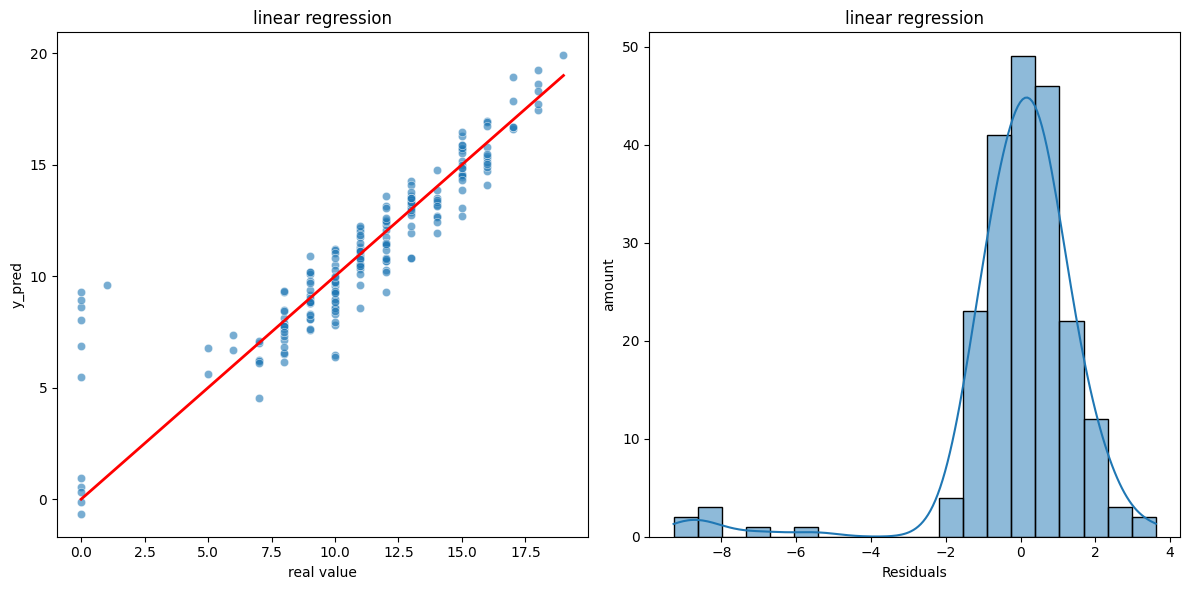

In [92]:
plt.figure(figsize=(12, 6))

# نمودار ۱: مقایسه مقادیر واقعی و پیش‌بینی‌شده
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)  
plt.xlabel('real value')
plt.ylabel('y_pred')
plt.title('linear regression')

# نمودار ۲: توزیع خطاها (Residuals)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('amount')
plt.title('linear regression')

plt.tight_layout()
plt.show()

## Ploynomial regression

In [93]:
from sklearn.preprocessing import PolynomialFeatures

In [94]:
X = df.drop('G3', axis=1)  
y = df['G3']  


X = pd.get_dummies(X, drop_first=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Creating polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# Creating and training the regression model
model = LinearRegression()  
model.fit(X_train_poly, y_train)  # Training the model on the training data


# Prediction on test data
y_pred = model.predict(X_test_poly)

#  Model evaluation
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f"Mean Squared Error: {mse}")  
print(f"R^2 Score: {r2}")  


print("Coefficients:", model.coef_)  
print("Intercept:", model.intercept_)  

Mean Squared Error: 1276.6509449772893
R^2 Score: -81.57331067952477
Coefficients: [-2.19359188e-09  3.24614003e+01  2.47367140e+01  1.41676827e+00
  3.65820100e+00 -1.30151151e+01 -3.68918105e+00  1.66694377e+01
  4.89559078e+01  8.94323760e+00  4.51642653e+01 -9.70676355e-01
 -7.65275743e+00 -4.87452206e-01 -3.33389476e+00  8.77451625e+00
  4.30305879e+01  1.90503783e+00 -5.12037205e+01  8.95046458e+00
 -1.54081272e+01 -8.65610852e+00 -2.88555474e+01 -1.92602742e+01
  7.91623175e+00 -2.45311018e+00  9.46945639e+00 -4.52810456e+00
 -8.60496324e+00  4.89112186e+00  2.22972082e+01  1.30608025e+01
 -9.89123883e+00  2.22224952e+01 -1.45564842e+01  6.37506351e+00
  7.56083813e+00 -9.35418269e+00  2.09374123e+01  3.52630812e+01
  1.42629431e+01 -2.62888051e+01 -2.64869235e-01 -5.58946161e-01
  1.19615515e-01  8.59490426e-03  1.05516779e+00 -1.48641374e+00
 -7.36706169e-01 -1.60583334e+00 -8.63959646e-01 -8.11447095e-01
  1.81543464e+00  3.99993774e-01  8.99137887e-02  2.74605779e-01
 -3.484

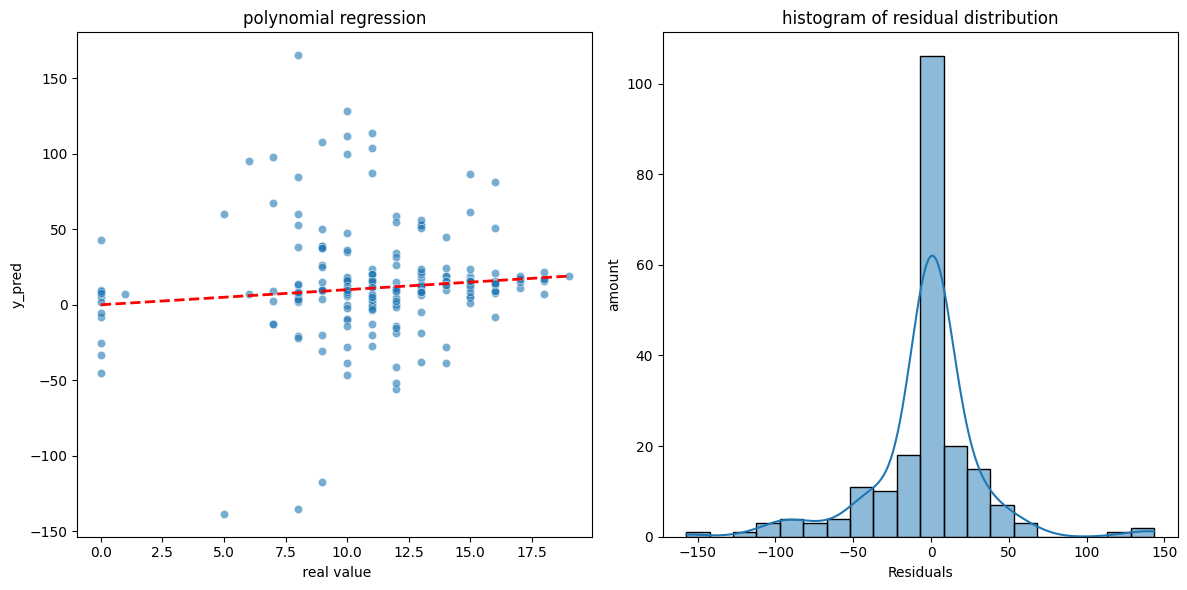

In [46]:

plt.figure(figsize=(12, 6))

# نمودار ۱: مقایسه مقادیر واقعی و پیش‌بینی‌شده
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # خط y=x
plt.xlabel(' real value')
plt.ylabel('y_pred')
plt.title('polynomial regression')

# نمودار ۲: توزیع خطاها (Residuals)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('amount')
plt.title('histogram of residual distribution')

plt.tight_layout()
plt.show()

## Decision tree model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [72]:
X = pd.get_dummies(X, drop_first=True)

model = DecisionTreeRegressor(random_state=42)  
model.fit(X_train, y_train) 


y_pred = model.predict(X_test)


# Model evaluation
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f"Mean Squared Error: {mse}")  
print(f"R^2 Score: {r2}") 

Mean Squared Error: 4.6028708133971294
R^2 Score: 0.7022880191428369


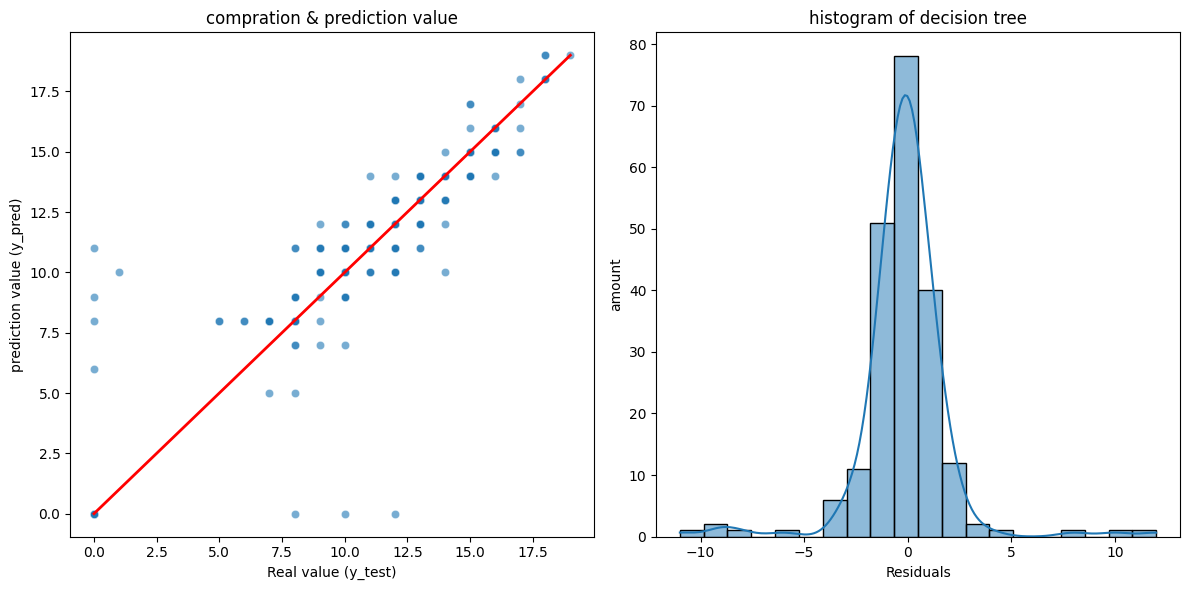

In [73]:

plt.figure(figsize=(12, 6))

# نمودار ۱: مقایسه مقادیر واقعی و پیش‌بینی‌شده
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)  # خط y=x
plt.xlabel('Real value (y_test)')
plt.ylabel('prediction value (y_pred)')
plt.title('compration & prediction value')

# نمودار ۲: توزیع خطاها (Residuals)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('amount')
plt.title('histogram of decision tree')

plt.tight_layout()
plt.show()